<a href="https://colab.research.google.com/github/derrodo61/notebooks/blob/main/clean_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq duckduckgo-images-api
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which i

In [16]:
from fastbook import *
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return search_images_ddg(term, max_images=max_images)

In [5]:
# search for test photos

urls = search_images('Scarlett Johansson photos', max_images=3)
urls

Searching for 'Scarlett Johansson photos'


(#3) ['https://celebmafia.com/wp-content/uploads/2020/06/scarlett-johansson-under-the-skin-premiere-in-venice-19.jpg','http://1.bp.blogspot.com/-cezIoFeHTNQ/TaexTlub2SI/AAAAAAAAFI0/_BRaf1slp3M/s1600/scarlett-johansson13903.jpg','http://www.vidigy.com/wp-content/uploads/2010/11/Scarlett_Johansson_1110_06.jpg']

In [6]:
# download 1 test photo

path = '/content/samples/scarlett/'
dest = Path(path)
dest.mkdir(exist_ok=True, parents=True)
url = urls[1]
fpath = download_url(url, dest)
fpath

Path('/content/samples/scarlett/scarlett-johansson13903.jpg')

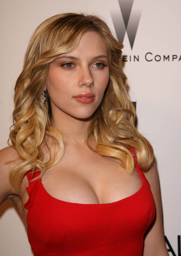

In [7]:
# show the downloaded photo

from fastai.vision.all import *

im = Image.open(fpath)
im.to_thumb(256,256)

In [8]:
# download 90 images of each,  Angelina and Scarlett

searches = 'Angelina Jolie','Scarlett Johansson'

path = Path('angelina_or_scarlett')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo',max_images=30))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} photo',max_images=30))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} photo',max_images=30))
    sleep(10)  # Pause between searches to avoid over-loading server

    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Angelina Jolie photo'
Searching for 'Angelina Jolie photo'
Searching for 'Angelina Jolie photo'
Searching for 'Scarlett Johansson photo'
Searching for 'Scarlett Johansson photo'
Searching for 'Scarlett Johansson photo'


In [10]:
# remove photos which cannot be opened

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

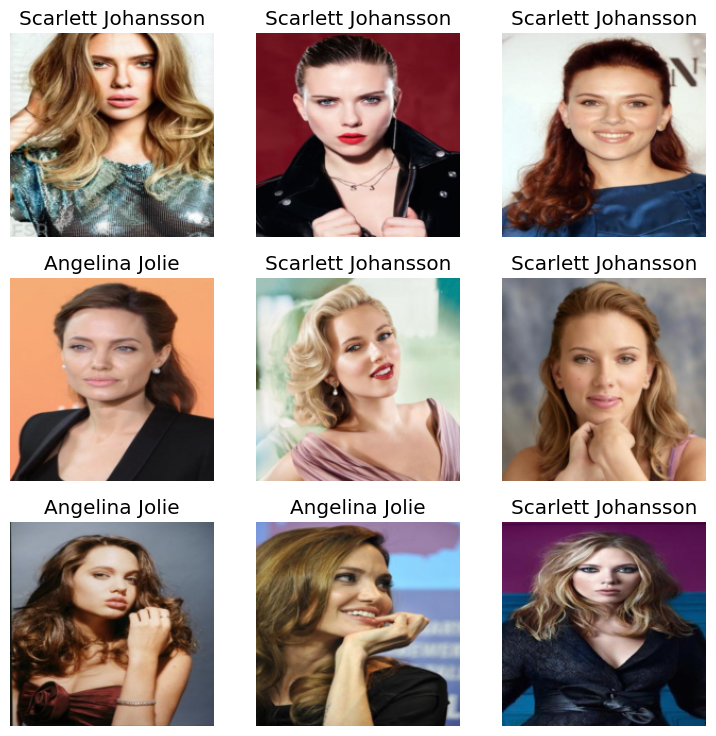

In [32]:
# create the data set

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

# resize option:
# Resize(192, method='squish')
# Resize(192, method='pad', pad_mode="zeros")

In [42]:
# train

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.113282,1.042903,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.450635,0.834237,0.500000,00:01
1,1.213081,0.551253,0.333333,00:01
2,1.019875,0.400025,0.250000,00:00
3,0.846943,0.356610,0.166667,00:00


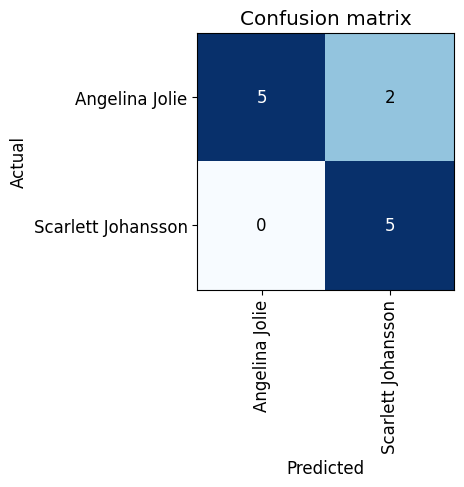

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

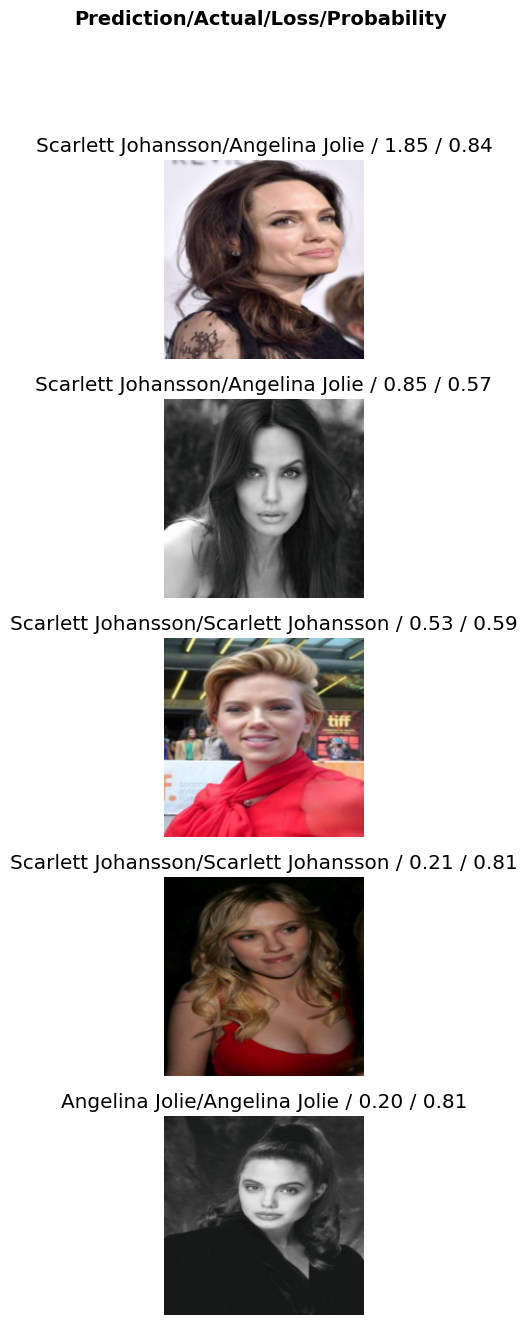

In [44]:
interp.plot_top_losses(5, nrows=5)

In [45]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# this actually moves and delete the files

# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [31]:
# this deletes duplicates
# not clear if it maybe deletes too much. testing required.

#!pip install imagehash

from PIL import Image
import imagehash
import os

def find_duplicate_images(directory):
    image_hashes = {}
    duplicates = []

def find_and_delete_duplicate_images(directory):
    image_hashes = {}
    duplicates = []

    for filepath in directory.iterdir():
        if filepath.suffix in {".jpg", ".png"}:
            with Image.open(filepath) as img:
                hash = imagehash.average_hash(img)
                if hash in image_hashes:
                    duplicates.append(filepath)
                else:
                    image_hashes[hash] = filepath

    # Delete duplicates
    for dup in duplicates:
        print(f"Deleting duplicate: {dup}")
        dup.unlink()

# Define the base path and the subdirectory
base_path = path
sub_directory = 'Angelina Jolie'

# Get the full path
full_path = base_path / sub_directory

# Find and delete duplicates
find_and_delete_duplicate_images(full_path)

# Define the base path and the subdirectory
base_path = path
sub_directory = 'Scarlett Johansson'

# Get the full path
full_path = base_path / sub_directory

# Find and delete duplicates
find_and_delete_duplicate_images(full_path)